### BY Aditi Sharma
Datast link:https://www.kaggle.com/uciml/sms-spam-collection-dataset 

## Importing libraries

In [44]:
import numpy as np
import pandas as pd

## Dataset 

In [3]:
df= pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#data Cleaning
#eda
#model training
#model building

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4' ], inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [13]:
#changing ham to 0 and spam to 1 using apply
df['target']= df['target'].apply(lambda x:1 if x == 'spam' else 0) 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing vslues checking
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#duplicates values checking
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

## Data visualisation

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

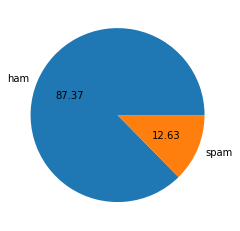

In [21]:
plt.pie( df['target'].value_counts(), labels=['ham','spam'], autopct= "%0.2f")
plt.show()

## Model Training and model building

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(df.text, df.target,test_size= 0.25)

In [24]:
x_train

1009    Dear Hero,i am leaving to qatar tonite for an ...
4426            So what did the bank say about the money?
2199               Not sure I have the stomach for it ...
322     cud u tell ppl im gona b a bit l8 cos 2 buses ...
2570                     From 5 to 2 only my work timing.
                              ...                        
5000    Nope. Since ayo travelled, he has forgotten hi...
5221    Jane babes not goin 2 wrk, feel ill after lst ...
3252                  K:)k..its good:)when are you going?
3530                 Prepare to be pounded every night...
3889    Double Mins & 1000 txts on Orange tariffs. Lat...
Name: text, Length: 3876, dtype: object

In [25]:
x_test

1685                  Cramps stopped. Going back to sleep
1659                         Yeah, where's your class at?
2712    Hey you still want to go for yogasana? Coz if ...
4897         Oh for fuck's sake she's in like tallahassee
4956              I'm vivek:)i got call from your number.
                              ...                        
415                   Whatsup there. Dont u want to sleep
274                       No objection. My bf not coming.
4130    \Its Ur luck to Love someone. Its Ur fortune t...
10      I'm gonna be home soon and i don't want to tal...
837     Sir, I have been late in paying rent for the p...
Name: text, Length: 1293, dtype: object

In [28]:
#convert text into vectors
from sklearn.feature_extraction.text import CountVectorizer


In [29]:
v= CountVectorizer()

In [30]:
x_train_count  = v.fit_transform(x_train.values)

In [33]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
#model building
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [38]:
#checking spam or not spam
emails = ['20% discount in this deal', 'Hey Mohan! meet me at a restaurant for further discussion']

In [39]:
emails_count = v.transform(emails)

In [40]:
model.predict(emails_count)

array([0, 0], dtype=int64)

In [41]:
x_test_count = v.transform(x_test)

In [43]:
model.score(x_test_count,y_test)

0.9822119102861562